In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

##### 1.	Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):</br> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],</br> ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].</br> Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$\displaystyle ks=a+b\cdot zp$  
Найдем коэффициент $b$ по формуле:  
$\displaystyle b=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$

Расчитаем интерсепт по формуле:  
$a=\bar y-b\cdot\bar x=\bar{ks}-b\cdot\bar{zp}$

In [3]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
a = np.mean(ks)-b*np.mean(zp)
print(f'a = {a:.2f}\nb = {b:.2f}')

a = 444.18
b = 2.62


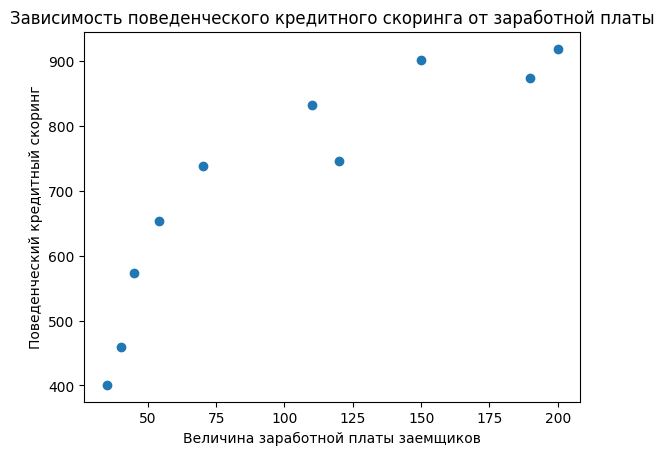

In [4]:
plt.title('Зависимость поведенческого кредитного скоринга от заработной платы')
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Коэффициент детерминации = 0.79


ks = 444.18 + 2.62*zp


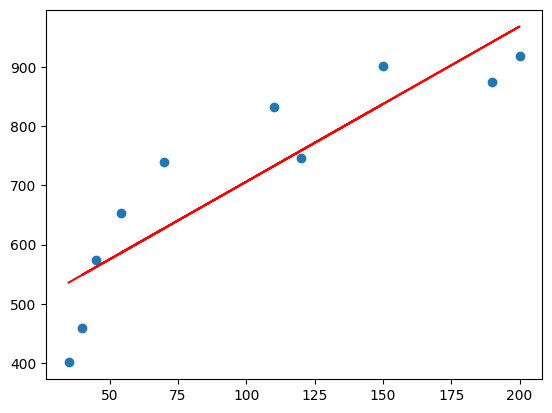

In [5]:
plt.scatter(zp, ks)
model = LinearRegression()
zp = zp.reshape(-1, 1)
model.fit(zp, ks)
print(f'Коэффициент детерминации = {model.score(zp, ks):.2f}')
# y = a + bx <=> y = kx + b
b = model.coef_
a = model.intercept_
print(f'ks = {a:.2f} + {b[0]:.2f}*zp')
plt.plot(zp, a+b*zp, c = 'r');

##### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [6]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)

Для $b$=2.62:

In [7]:
def mse(b, zp, ks):
    return np.sum((b*zp-ks)**2)/len(zp)

mse(b, zp, ks)

203763.93896082853

Производная функции потерь:

In [8]:
def mse_p(b, zp, ks):
    return (2/len(zp)) * np.sum((b*zp-ks)*zp)

alpha=1e-6
b=0.1
iteration=10000
mse_min=mse(b, zp, ks)
i_min, b_min = 1, b

for i in range(iteration):
    b-=alpha*mse_p(b, zp, ks)
    if i%100==0:
        print(f'Итерация #{i}: b={b:.2f}, mse={mse(b, zp, ks):.2f}')
    if mse(b, zp, ks) > mse_min:
        print(f'Итерация #{i_min}: b={b_min:.2f}, mse={mse_min:.2f}\nДостигнут минимум: {b_min:.2f} ')
        break
    else:
        mse_min=mse(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0: b=0.26, mse=493237.72
Итерация #100: b=5.55, mse=58151.32
Итерация #200: b=5.87, mse=56522.98
Итерация #300: b=5.89, mse=56516.88
Итерация #400: b=5.89, mse=56516.86
Итерация #500: b=5.89, mse=56516.86
Итерация #600: b=5.89, mse=56516.86
Итерация #628: b=5.89, mse=56516.86
Достигнут минимум: 5.89 


##### 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Функция потерь:

In [9]:
def mse_ab(a, b, zp, ks):
    return np.sum(((a+b*zp)-ks)**2)/len(zp)

Частная производная функции потерь по $a$:  

In [10]:
def mse_pa(a, b, zp, ks): 
    return 2*np.sum((a+b*zp)-ks)/len(zp)

Частная производная функции потерь по $b$:

In [11]:
def mse_pb(a, b, zp, ks):
    return 2 * np.sum(((a + b * zp) - ks) * zp) / len(zp)

alpha=5e-5
a, b = 0.1, 0.1
mseab_min=mse_ab(a, b, zp, ks)
i_min, a_min, b_min = 1, a, b
   
for i in range(1000000):
    a-=alpha*mse_pa(a, b, zp, ks)
    b-=alpha*mse_pb(a, b, zp, ks)
    if i%50000==0:
        print(f'Итерация #{i}: a={a:.2f}, b={b:.2f}, mse={mse_ab(a, b, zp, ks):.2f}')
    if mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}: a={a_min:.2f}, b={b_min:.2f}, mse={mseab_min:.2f}\nДостигнут минимум: ', end='')
        break
    else:
        mseab_min=mse_ab(a, b, zp, ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min:.2f}, b={b_min:.2f}')

Итерация #0: a=0.17, b=8.07, mse=122318.06
Итерация #50000: a=319.28, b=3.54, mse=10427.57
Итерация #100000: a=409.04, b=2.88, mse=6783.52
Итерация #150000: a=434.29, b=2.69, mse=6495.19
Итерация #200000: a=441.40, b=2.64, mse=6472.37
Итерация #250000: a=443.40, b=2.63, mse=6470.57
Итерация #300000: a=443.96, b=2.62, mse=6470.43
Итерация #350000: a=444.12, b=2.62, mse=6470.42
Итерация #400000: a=444.16, b=2.62, mse=6470.41
Итерация #450000: a=444.17, b=2.62, mse=6470.41
Итерация #500000: a=444.18, b=2.62, mse=6470.41
Итерация #520164: a=444.18, b=2.62, mse=6470.41
Достигнут минимум: a=444.18, b=2.62
